In [6]:

import tensorflow as tf
import os
from os import listdir
from random import shuffle
import matplotlib.pyplot as plt
import numpy as np
import cv2
import imageio
from keras.utils import to_categorical
model_class = tf.keras.models.load_model('C:\\Users\\Gilbert\\Documents\\PhD workshe\\Applications Developments\\age_detect\\afrinet-cnn-class.h5')
model_reg = tf.keras.models.load_model('C:\\Users\\Gilbert\\Documents\\PhD workshe\\Applications Developments\\age_detect\\afrinet-cnn-reg.h5')

# changing dir and loading images in the folder

filepath = "C:\\Users\\Gilbert\\Documents\\WIKI_ART"
os.chdir(filepath)

onlyfiles = os.listdir()
len(onlyfiles)





3659

3659
21: 136
9: 159
6: 114
11: 63
8: 236
28: 145
27: 126
24: 191
23: 92
5: 180
7: 126
17: 103
29: 150
10: 140
26: 279
25: 156
22: 139
16: 212
30: 109
14: 137
18: 181
12: 106
13: 75
19: 58
15: 143
20: 103


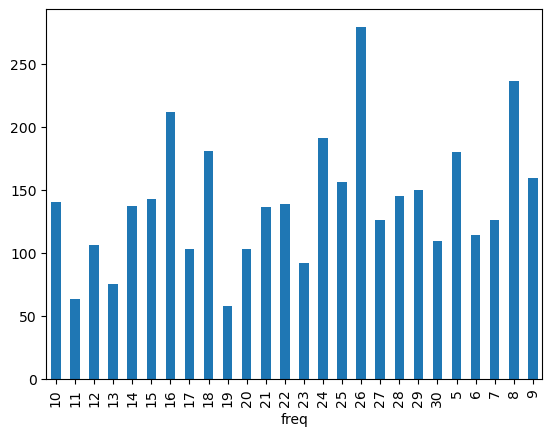

,freq
0,21
1,9
2,6
3,11
4,8


In [8]:
shuffle(onlyfiles)
ages = [i.split('_')[0] for i in onlyfiles]
print (len(ages))

elements_count = {}
# iterating over the elements for frequency
for element in ages:
   # checking whether it is in the dict or not
   if element in elements_count:
      # incerementing the count by 1
      elements_count[element] += 1
   else:
      # setting the count to 1
      elements_count[element] = 1
# printing the elements frequencies
for key, value in elements_count.items():
   print(f"{key}: {value}")

import pandas as pd

df = pd.DataFrame({'freq': ages})
df.groupby('freq', as_index=True).size().plot(kind='bar')
plt.show()
df.head()

In [9]:
filepaths = pd.Series(onlyfiles, name='Filepath').astype(str)
ages = pd.Series(ages, name='Age').astype(np.int32)

images = pd.concat([filepaths, ages], axis=1).sample(frac=1.0, random_state=1).reset_index(drop=True)

Age: 15


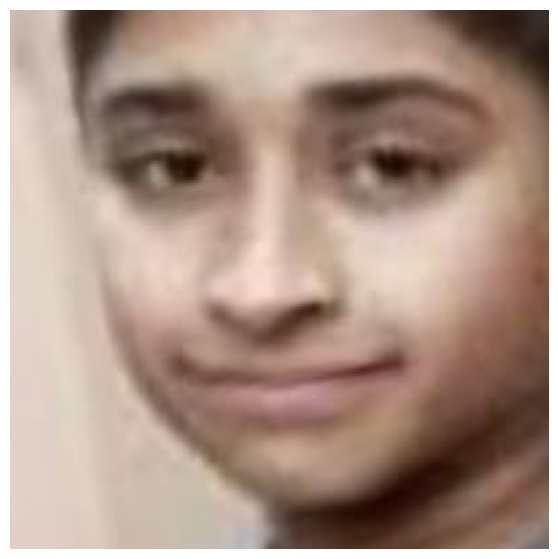

In [10]:
df_age = pd.DataFrame({'Ages': ages})
def visualize(image):
    plt.figure(figsize=(7, 7))
    plt.axis('off')
    plt.imshow(image)

#choose an image id to see its age
image_id = 1
image_example_path = images.iloc[image_id].Filepath
age = images.iloc[image_id].Age

print(f'Age: {age}')
image = cv2.imread(image_example_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
visualize(image)

In [11]:

classes = []
for i in ages:
  if(i!="model.png"):
      i = int(i)
      
      if (i>=15) and (i<=17):
          classes.append(0)
      if (i>=18) and (i<=25):
          classes.append(1)
      if (i>=26) and (i<=30):
          classes.append(2)
            
            
classes[:3]

categorical_labels = to_categorical(classes, num_classes=3)
categorical_labels.shape

(2323, 3)

In [12]:

X_data =[]
for file in onlyfiles:
  if(file !="model.png"):
      img=imageio.imread(file,pilmode="RGB")
      img =cv2.resize(img, (224,224))
      X_data.append(img)



X = np.squeeze(X_data)
X.shape


# normalize data
X = X.astype('float32')
X /= 255

C:\Users\Gilbert\AppData\Local\Temp\ipykernel_10304\3494566904.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img=imageio.imread(file,pilmode="RGB")


In [13]:
agelabel=np.array(ages)

agelabel[3]

11

In [14]:
yhat = model_reg.predict(X)
true_ages=ages



from sklearn.metrics import mean_squared_error 
# Calculation of Mean Squared Error (MSE)
mse= mean_squared_error(true_ages ,yhat)

print ("The MSE",mse)
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(true_ages ,yhat)
print ("The MAE",mae)

rmse = np.sqrt(mse)

print ("this is the rmse",rmse )
from sklearn.metrics import r2_score
r2 = r2_score(true_ages,yhat )
print("Test R^2 Score: {:.5f}".format(r2))


115/115 ━━━━━━━━━━━━━━━━━━━━ 58s 495ms/step
The MSE 87.60460617790426
The MAE 7.701705465553953
this is the rmse 9.359733232197607
Test R^2 Score: -0.47418


In [15]:
from sklearn.metrics import classification_report, confusion_matrix

yhat = model_class.predict(X)
true_ages=categorical_labels

y_pred=np.argmax(yhat, axis=1)
y_test=np.argmax(true_ages, axis=1)
cm_class = confusion_matrix(y_test, y_pred)
print(cm_class)
print(yhat.shape)
import seaborn as sns
sns.heatmap(cm_class, fmt="d", annot=True)

115/115 ━━━━━━━━━━━━━━━━━━━━ 64s 550ms/step


ValueError: Found input variables with inconsistent numbers of samples: [2323, 3659]

In [ ]:
from sklearn.metrics import classification_report

predicted_classes = np.argmax(yhat, axis=1)
true_classes = np.argmax(true_ages, axis=1)
report = classification_report(true_classes, predicted_classes)
print (report)
